We will examine cancer patients in this project. In this csv file, we have 300 data. We will use some of this data and we will try to estimate the rest with predictive KNN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Cancer.csv')

In [3]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
gender = dataset.GENDER

In [7]:
xData = dataset.drop("LUNG_CANCER",axis=1) 
xData = dataset.drop("GENDER",axis=1) 
xData.values

array([[69, 1, 2, ..., 2, 2, 'YES'],
       [74, 2, 1, ..., 2, 2, 'YES'],
       [59, 1, 1, ..., 1, 2, 'NO'],
       ...,
       [58, 2, 1, ..., 1, 2, 'YES'],
       [67, 2, 1, ..., 1, 2, 'YES'],
       [62, 1, 1, ..., 2, 1, 'YES']], dtype=object)

In [8]:
type(xData)

pandas.core.frame.DataFrame

In [9]:
y = dataset['LUNG_CANCER'].values
y

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YE

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
gender = le.fit_transform(gender)
gender


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [12]:
newY = le.fit_transform(y)
newY

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
type(gender)

numpy.ndarray

In [14]:
xData = xData.assign(Gender=gender)
#men 1 

In [15]:
newData = xData.assign(Cancer=newY)
newData.drop("LUNG_CANCER",axis=1,inplace=True)

In [16]:
newXdata = newData.drop("Cancer",axis=1)
newXdata

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Gender
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [17]:
newData
#gender 1 
#not gender 0 

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Gender,Cancer
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(newXdata,newY,test_size=0.4,random_state=4)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (185, 15)
y_train: (185,)


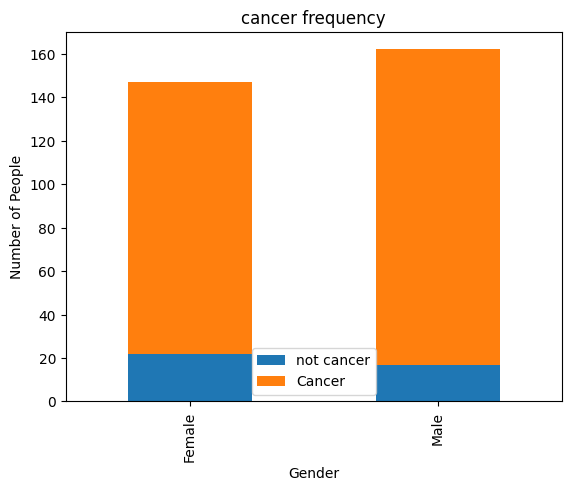

In [20]:
grouped = newData.groupby(["Gender", "Cancer"]).size().unstack()
grouped.plot(kind="bar", stacked=True)

# grafik özellikleri
plt.title("cancer frequency")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(["not cancer", "Cancer"])
plt.show()

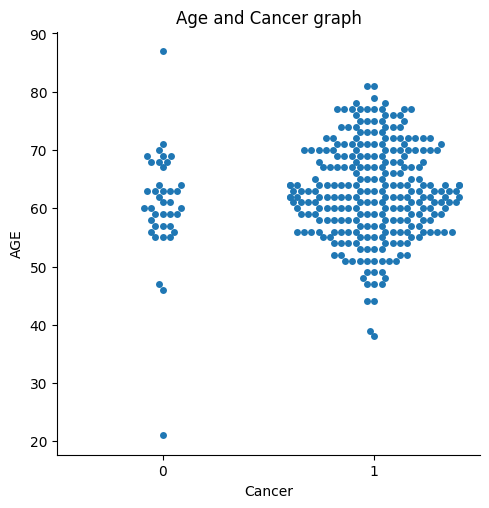

In [21]:
sns.catplot(x='Cancer', y='AGE', data=newData, kind='swarm')
plt.title('Age and Cancer graph')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
def sklearn_knn(train_data,label_data,test_data,k):
    # knn classifier yarat
    knn = KNeighborsClassifier(n_neighbors=k)
     # Train -> X_train
    knn.fit(train_data, label_data)
    
    # Predict -> X_test
    predict_label = knn.predict(test_data)
    
    # Return
    return predict_label

In [24]:
y_predict = sklearn_knn(X_train,y_train,X_test,1)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_sklearn = accuracy_score(y_test,y_predict) * 100

In [27]:
print('Accuracy: ' + str(round(accuracy_sklearn, 2)) + ' %.')

Accuracy: 91.94 %.


In [28]:
n = len(dataset)
n

309

In [29]:
import math
k_max = math.sqrt(n)
k_max

17.578395831246947

# We find best k value for best Accuracy. 

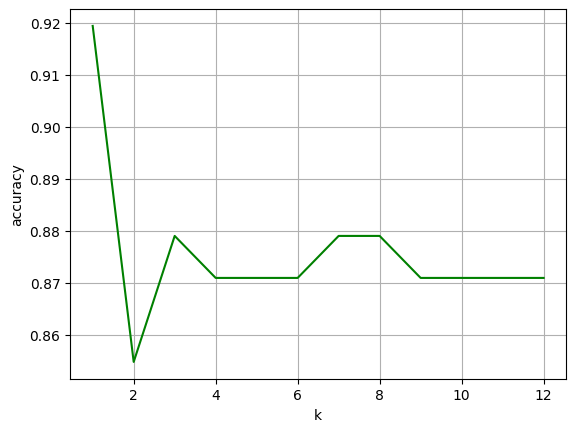

In [30]:
# Accuracy oranları için bir liste yarat
normal_accuracy = []  

k_value = range(1, 13)

# döngü ile tek tek K değerlerine bak
for k in k_value:
    y_predict = sklearn_knn(X_train, y_train, X_test, k)
    accur = accuracy_score(y_test, y_predict)
    normal_accuracy.append(accur)
    
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_value, normal_accuracy, c='g')
plt.grid(True)  
plt.show()

In [31]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)

In [32]:
sm_model = sm.OLS(y_train, X_train_ols)
sonuc = sm_model.fit()

In [33]:
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     5.800
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.43e-09
Time:                        03:25:32   Log-Likelihood:                -18.958
No. Observations:                 185   AIC:                             69.92
Df Residuals:                     169   BIC:                             121.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2700      0.293     -4.328      0.000      -1.849      -0.691
AGE                       0.0046      0.003      1.712      0.089      -0.001       0.010
SMOKING                   0.0514      0.046      1.119      0.265      -0.039       0.142
YELLOW_FINGERS            0.1126      0.054      2.102      0.037       0.007       0.218
ANXIETY                   0.0590      0.056      1.058      0.292      -0.051       0.169
PEER_PRESSURE             0.0732      0.050      1.461      0.146      -0.026       0.172
CHRONIC DISEASE           0.1001      0.045      2.224      0.028       0.011       0.189
FATIGUE                   0.1545      0.051      3.042      0.003       0.054       0.255
ALLERGY                   0.1481      0.045      3.306      0.001       0.060       0.237
WHEEZING                  0.0792      0.048      1.662      0.098      -0.015       0.173
ALCOHOL CONSUMING         0.1434      0.053      2.718      0.007       0.039       0.248
COUGHING                  0.0665      0.053      1.256      0.211      -0.038       0.171
SHORTNESS OF BREATH       0.0533      0.054      0.992      0.323      -0.053       0.159
SWALLOWING DIFFICULTY     0.1011      0.052      1.931      0.055      -0.002       0.204
CHEST PAIN                0.0484      0.047      1.031      0.304      -0.044       0.141
Gender                    0.0130      0.050      0.261      0.795      -0.086       0.112
==============================================================================
Omnibus:                       28.978   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.777
Skew:                          -0.983   Prob(JB):                     6.26e-09
Kurtosis:                       4.017   Cond. No.                         906.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""